<a href="https://colab.research.google.com/github/SamuelRuby/RubytheScientist.github.io/blob/main/Analyzing_police_activity_with_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's explore the Stanford Open Policing Project dataset, with emphasis on the policing dataset from Rhode Island, and analyze the impact of gender on police behavior. This project is to gain more practice cleaning messy data, creating visualizations, combining and reshaping datasets, and manipulating time series data. It'll be a valuable experience analyzing a dataset from start to finish.

The data was gotten from the Stanford Open Policing Project linked below:

https://openpolicing.stanford.edu/publications/

Examining the dataset

In [3]:
# Import the pandas library as pd
import pandas as pd

# Read 'police.csv' into a DataFrame named ri
ri = pd.read_csv('/content/sample_data/police.csv')

# Examine the head of the DataFrame
print(ri.head())

# Count the number of missing values in each column
print(ri.isnull().sum())

    stop_date stop_time  county_name driver_gender  driver_age_raw  \
0  2005-01-02     01:55          NaN             M          1985.0   
1  2005-01-18     08:15          NaN             M          1965.0   
2  2005-01-23     23:15          NaN             M          1972.0   
3  2005-02-20     17:15          NaN             M          1986.0   
4  2005-03-14     10:00          NaN             F          1984.0   

   driver_age driver_race     violation_raw violation search_conducted  \
0        20.0       White          Speeding  Speeding            False   
1        40.0       White          Speeding  Speeding            False   
2        33.0       White          Speeding  Speeding            False   
3        19.0       White  Call for Service     Other            False   
4        21.0       White          Speeding  Speeding            False   

  search_type   stop_outcome is_arrested stop_duration drugs_related_stop  
0         NaN       Citation       False      0-15 Min    

Drop columns

In [4]:
# Examine the shape of the DataFrame
print(ri.shape)

# Drop the 'county_name' and 'state' columns
ri.drop(['county_name'], axis='columns', inplace=True)

# Examine the shape of the DataFrame (again)
print(ri.shape)

(52969, 15)
(52969, 14)


Drop rows

In [5]:
# Count the number of missing values in each column
print(ri.isnull().sum())

# Drop all rows that are missing 'driver_gender'
ri.dropna(subset=['driver_gender'], inplace=True)

# Count the number of missing values in each column (again)
print(ri.isnull().sum())

# Examine the shape of the DataFrame
print(ri.shape)

stop_date                 0
stop_time                 0
driver_gender          3385
driver_age_raw         3378
driver_age             3620
driver_race            3385
violation_raw          3385
violation              3385
search_conducted          1
search_type           50884
stop_outcome           3385
is_arrested            3385
stop_duration          3385
drugs_related_stop        1
dtype: int64
stop_date                 0
stop_time                 0
driver_gender             0
driver_age_raw            1
driver_age              241
driver_race               1
violation_raw             1
violation                 1
search_conducted          1
search_type           47499
stop_outcome              1
is_arrested               1
stop_duration             1
drugs_related_stop        1
dtype: int64
(49584, 14)


Fix data types

In [6]:
# Examine the head of the 'is_arrested' column
print(ri.is_arrested.head())

# Change the data type of 'is_arrested' to 'bool'
ri['is_arrested'] = ri.is_arrested.astype('bool')

# Check the data type of 'is_arrested' 
print(ri.is_arrested.dtype)

0    False
1    False
2    False
3     True
4    False
Name: is_arrested, dtype: object
bool


Combining object columns

In [7]:
# Concatenate 'stop_date' and 'stop_time' (separated by a space)
combined = ri.stop_date.str.cat(ri.stop_time, sep= ' ')

# Convert 'combined' to datetime format
ri['stop_datetime'] = pd.to_datetime(combined)

# Examine the data types of the DataFrame
print(ri.dtypes)

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted              object
search_type                   object
stop_outcome                  object
is_arrested                     bool
stop_duration                 object
drugs_related_stop            object
stop_datetime         datetime64[ns]
dtype: object


Setting Index

In [8]:
# Set 'stop_datetime' as the index
ri.set_index('stop_datetime', inplace=True)

# Examine the index
print(ri.index)

# Examine the columns
print(ri.columns)

DatetimeIndex(['2005-01-02 01:55:00', '2005-01-18 08:15:00',
               '2005-01-23 23:15:00', '2005-02-20 17:15:00',
               '2005-03-14 10:00:00', '2005-03-23 09:45:00',
               '2005-04-01 17:30:00', '2005-06-06 13:20:00',
               '2005-07-13 10:15:00', '2005-07-13 15:45:00',
               ...
               '2011-10-04 20:35:00', '2011-10-04 22:22:00',
               '2011-10-04 22:36:00', '2011-10-04 23:25:00',
               '2011-10-05 06:43:00', '2011-10-05 07:19:00',
               '2011-10-05 09:12:00', '2011-10-05 10:14:00',
               '2011-10-05 11:00:00', '2011-10-05 11:30:00'],
              dtype='datetime64[ns]', name='stop_datetime', length=49584, freq=None)
Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')


Examining Data Violations

In [9]:
# Count the unique values in 'violation'
print(ri.violation.value_counts())

# Express the counts as proportions
print(ri.violation.value_counts (normalize= True))

Speeding               32139
Moving violation        8386
Equipment               4276
Other                   2962
Registration/plates     1820
Name: violation, dtype: int64
Speeding               0.648186
Moving violation       0.169131
Equipment              0.086239
Other                  0.059738
Registration/plates    0.036706
Name: violation, dtype: float64


Comparing violations by gender

In [10]:
# Create a DataFrame of female drivers
female = ri[ri.driver_gender == 'F']

# Create a DataFrame of male drivers
male = ri[ri.driver_gender == 'M']

# Compute the violations by female drivers (as proportions)
print(female.violation.value_counts(normalize= True))

# Compute the violations by male drivers (as proportions)
print(male.violation.value_counts (normalize= True))

Speeding               0.761619
Moving violation       0.106783
Equipment              0.065683
Registration/plates    0.038719
Other                  0.027195
Name: violation, dtype: float64
Speeding               0.607805
Moving violation       0.191325
Equipment              0.093557
Other                  0.071323
Registration/plates    0.035990
Name: violation, dtype: float64


Comparing speed outcomes by gender

In [11]:
# Create a DataFrame of female drivers stopped for speeding
female_and_speeding = ri[(ri.driver_gender == 'F') & (ri.violation == 'Speeding')]

# Create a DataFrame of male drivers stopped for speeding
male_and_speeding = ri[(ri.driver_gender == 'M') & (ri.violation == 'Speeding')]

# Compute the stop outcomes for female drivers (as proportions)
print(female_and_speeding.stop_outcome.value_counts (normalize= True))

# Compute the stop outcomes for male drivers (as proportions)
print(male_and_speeding.stop_outcome.value_counts(normalize= True))

Citation            0.974985
Warning             0.016038
Arrest Driver       0.006556
N/D                 0.001311
Arrest Passenger    0.000807
No Action           0.000303
Name: stop_outcome, dtype: float64
Citation            0.964769
Arrest Driver       0.017188
Warning             0.014488
Arrest Passenger    0.001530
N/D                 0.001260
No Action           0.000765
Name: stop_outcome, dtype: float64


Calcuate search rate

In [12]:
# Check the data type of 'search_conducted'
print(ri.search_conducted.dtype)

# Calculate the search rate by counting the values
print(ri.search_conducted.value_counts (normalize= True))

# Calculate the search rate by taking the mean
print(ri.search_conducted.mean())

object
False    0.957949
True     0.042051
Name: search_conducted, dtype: float64
0.04205070286186798


Comparing search rates by gender

In [13]:
# Calculate the search rate for female drivers
print(ri[ri.driver_gender == 'F'].search_conducted.mean())

# Calculate the search rate for male drivers
print(ri[ri.driver_gender == 'M'].search_conducted.mean())

# Calculate the search rate for both groups simultaneously
print(ri.groupby('driver_gender').search_conducted.mean())

#adding more factors to the analysis
# Calculate the search rate for each combination of gender and violation
print(ri.groupby(['driver_gender', 'violation']).search_conducted.mean())

# Reverse the ordering to group by violation before gender
print(ri.groupby(['violation', 'driver_gender']).search_conducted.mean())

0.023661365906122764
0.0485970573757042
driver_gender
F    0.023661
M    0.048597
Name: search_conducted, dtype: float64
driver_gender  violation          
F              Equipment              0.072515
               Moving violation       0.055396
               Other                  0.070621
               Registration/plates    0.107143
               Speeding               0.009078
M              Equipment              0.109032
               Moving violation       0.068039
               Other                  0.045245
               Registration/plates    0.155015
               Speeding               0.027267
Name: search_conducted, dtype: float64
violation            driver_gender
Equipment            F                0.072515
                     M                0.109032
Moving violation     F                0.055396
                     M                0.068039
Other                F                0.070621
                     M                0.045245
Registration/plate

Counting protective frisks

In [14]:
# Count the 'search_type' values
print(ri.search_type.value_counts())

# Check if 'search_type' contains the string 'Protective Frisk'
ri['frisk'] = ri.search_type.str.contains('Protective Frisk', na=False)

# Check the data type of 'frisk'
print(ri.frisk.dtype)

# Take the sum of 'frisk'
print(ri.frisk.sum())

Incident to Arrest                                          941
Probable Cause                                              447
Inventory                                                   129
Protective Frisk                                            120
Reasonable Suspicion                                        116
Incident to Arrest,Inventory                                 90
Incident to Arrest,Probable Cause                            68
Incident to Arrest,Protective Frisk                          31
Probable Cause,Reasonable Suspicion                          29
Probable Cause,Protective Frisk                              22
Incident to Arrest,Inventory,Probable Cause                  21
Inventory,Probable Cause                                     13
Incident to Arrest,Inventory,Protective Frisk                11
Inventory,Protective Frisk                                   10
Incident to Arrest,Probable Cause,Protective Frisk           10
Protective Frisk,Reasonable Suspicion   

Comparing frisk rates by gender

In [15]:
# Create a DataFrame of stops in which a search was conducted
searched = ri[ri.search_conducted == True]

# Calculate the overall frisk rate by taking the mean of 'frisk'
print(searched.frisk.mean())

# Calculate the frisk rate for each gender
print(searched.groupby('driver_gender').frisk.mean())

0.1040767386091127
driver_gender
F    0.074675
M    0.109173
Name: frisk, dtype: float64


Calculating hourly arrest rate



In [16]:
# Calculate the overall arrest rate
print(ri.is_arrested.mean())

# Calculate the hourly arrest rate
print(ri.groupby(ri.index.hour).is_arrested.mean())

# Save the hourly arrest rate
hourly_arrest_rate = ri.groupby(ri.index.hour).is_arrested.mean()

0.03771377863827041
stop_datetime
0     0.050225
1     0.064788
2     0.068707
3     0.053156
4     0.075342
5     0.037313
6     0.015625
7     0.012756
8     0.021704
9     0.026847
10    0.031113
11    0.030167
12    0.037919
13    0.035657
14    0.038302
15    0.034820
16    0.038310
17    0.037869
18    0.046926
19    0.040089
20    0.047878
21    0.057110
22    0.050777
23    0.042389
Name: is_arrested, dtype: float64


Plotting hourly arrest rate



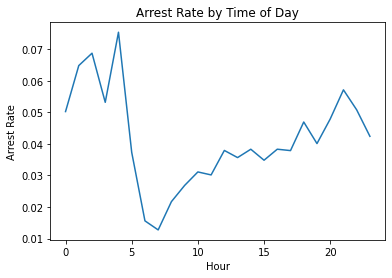

In [17]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Create a line plot of 'hourly_arrest_rate'
hourly_arrest_rate.plot()

# Add the xlabel, ylabel, and title
plt.xlabel('Hour')
plt.ylabel('Arrest Rate')
plt.title('Arrest Rate by Time of Day')

# Display the plot
plt.show()

Plotting drug-related stops

stop_datetime
2005-12-31    0.007186
2006-12-31    0.005818
2007-12-31    0.007524
2008-12-31    0.006993
2009-12-31    0.011607
2010-12-31    0.008721
2011-12-31    0.008851
Freq: A-DEC, Name: drugs_related_stop, dtype: float64


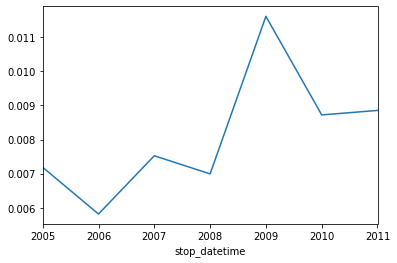

In [18]:
# Calculate the annual rate of drug-related stops
print(ri.drugs_related_stop.resample('A').mean())

# Save the annual rate of drug-related stops
annual_drug_rate = ri.drugs_related_stop.resample ('A').mean()

# Create a line plot of 'annual_drug_rate'
annual_drug_rate.plot()

# Display the plot
plt.show()

Comparing drug and serach rates

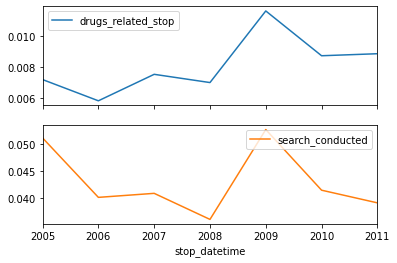

In [19]:
# Calculate and save the annual search rate
annual_search_rate = ri.search_conducted.resample('A').mean()

# Concatenate 'annual_drug_rate' and 'annual_search_rate'
annual = pd.concat([annual_drug_rate, annual_search_rate], axis='columns')

# Create subplots from 'annual'
annual.plot(subplots= True)

# Display the subplots
plt.show()

Tallying Violations by District

In [20]:
# Create a frequency table of districts and violations
print(pd.crosstab (ri.district, ri.violation))

# Save the frequency table as 'all_zones'
all_zones = pd.crosstab (ri.district, ri.violation)

# Select rows 'Zone K1' through 'Zone K3'
print(all_zones.loc ['Zone K1' : 'Zone K3'])

# Save the smaller table as 'k_zones'
k_zones = all_zones.loc ['Zone K1' : 'Zone K3']


# Create a bar plot of 'k_zones'
k_zones.plot(kind = 'bar')

# Display the plot
plt.show()

# Create a stacked bar plot of 'k_zones'
k_zones.plot(kind = 'bar', stacked = True)

# Display the plot
plt.show()

AttributeError: ignored

Converting stop durations to numbers

In [21]:
# Print the unique values in 'stop_duration'
print(ri.stop_duration.unique())

# Create a dictionary that maps strings to integers
mapping = {'0-15 Min': 8, '16-30 Min': 23, '30+ Min': 45 }

# Convert the 'stop_duration' strings to integers using the 'mapping'
ri['stop_minutes'] = ri.stop_duration.map(mapping)

# Print the unique values in 'stop_minutes'
print(ri.stop_minutes.unique())

['0-15 Min' '16-30 Min' '30+ Min' nan]
[ 8. 23. 45. nan]


Plotting stop-length

violation_raw
APB                                 25.627907
Call for Service                    25.004458
Equipment/Inspection Violation      13.528064
Motorist Assist/Courtesy            16.260504
Other Traffic Violation             16.040544
Registration Violation              16.612637
Special Detail/Directed Patrol      15.520716
Speeding                            11.015682
Suspicious Person                   20.709677
Violation of City/Town Ordinance    14.053435
Warrant                             22.900000
Name: stop_minutes, dtype: float64


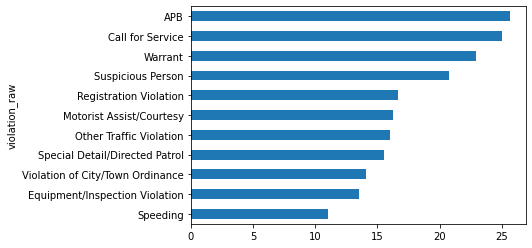

In [22]:
# Calculate the mean 'stop_minutes' for each value in 'violation_raw'
print(ri.groupby('violation_raw').stop_minutes.mean())

# Save the resulting Series as 'stop_length'
stop_length = ri.groupby('violation_raw').stop_minutes.mean()

# Sort 'stop_length' by its values and create a horizontal bar plot
stop_length.sort_values().plot(kind= 'barh')

# Display the plot
plt.show()

Plotting Temperature

              TMIN         TAVG         TMAX
count  4017.000000  1217.000000  4017.000000
mean     43.484441    52.493016    61.268608
std      17.020298    17.830714    18.199517
min      -5.000000     6.000000    15.000000
25%      30.000000    39.000000    47.000000
50%      44.000000    54.000000    62.000000
75%      58.000000    68.000000    77.000000
max      77.000000    86.000000   102.000000


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


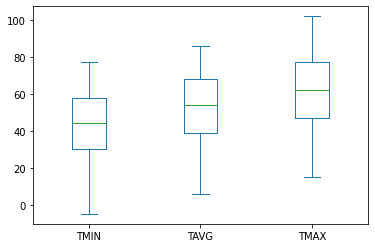

In [24]:
# Read 'weather.csv' into a DataFrame named 'weather'
weather = pd.read_csv('/content/sample_data/weather.csv')

# Describe the temperature columns
print(weather[['TMIN', 'TAVG', 'TMAX']].describe())

# Create a box plot of the temperature columns
weather [['TMIN', 'TAVG', 'TMAX']].plot(kind='box')

# Display the plot
plt.show()

Plotting Temperature difference

count    4017.000000
mean       17.784167
std         6.350720
min         2.000000
25%        14.000000
50%        18.000000
75%        22.000000
max        43.000000
Name: TDIFF, dtype: float64


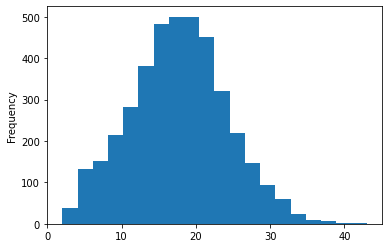

In [25]:
# Create a 'TDIFF' column that represents temperature difference
weather ['TDIFF'] = weather.TMAX - weather.TMIN

# Describe the 'TDIFF' column
print(weather.TDIFF.describe())

# Create a histogram with 20 bins to visualize 'TDIFF'
weather.TDIFF.plot(kind='hist', bins= 20)

# Display the plot
plt.show()

Counting bad weather conditions

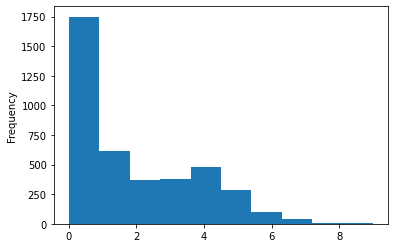

In [26]:
# Copy 'WT01' through 'WT22' to a new DataFrame
WT = weather.loc[:, 'WT01': 'WT22']

# Calculate the sum of each row in 'WT'
weather['bad_conditions'] = WT.sum(axis='columns')

# Replace missing values in 'bad_conditions' with '0'
weather['bad_conditions'] = weather.bad_conditions.fillna(0).astype('int')

# Create a histogram to visualize 'bad_conditions'
weather.bad_conditions.plot(kind='hist')

# Display the plot
plt.show()

Rating weather conditions

In [27]:
# Count the unique values in 'bad_conditions' and sort the index
print(weather.bad_conditions.value_counts().sort_index())

# Create a dictionary that maps integers to strings
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

# Convert the 'bad_conditions' integers to strings using the 'mapping'
weather['rating'] = weather.bad_conditions.map(mapping)

# Count the unique values in 'rating'
print(weather.rating.value_counts())

0    1749
1     613
2     367
3     380
4     476
5     282
6     101
7      41
8       4
9       4
Name: bad_conditions, dtype: int64
bad      1836
good     1749
worse     432
Name: rating, dtype: int64


Changing data type to category

In [32]:
from pandas.api.types import CategoricalDtype
# Create a list of weather ratings in logical order
cat_dtype = CategoricalDtype(
    categories=['good', 'bad', 'worse'], ordered=True)

# Change the data type of 'rating' to category
weather['rating'] = weather.rating.astype(cat_dtype)

#weather['rating'] = weather.rating.astype('category', copy=True, categories= cats)
#cat_dtype = CategoricalDtype(
   # categories=[2, 1], ordered=True)
#ser.astype(cat_dtype)

# Examine the head of 'rating'
print(weather.rating.head())

0    bad
1    bad
2    bad
3    bad
4    bad
Name: rating, dtype: category
Categories (3, object): ['good' < 'bad' < 'worse']


Preparing & Merging the dataframes

In [33]:
# Reset the index of 'ri'
ri.reset_index(inplace= True)

# Examine the head of 'ri'
print(ri.head())

# Create a DataFrame from the 'DATE' and 'rating' columns
weather_rating = weather[['DATE', 'rating']]

# Examine the head of 'weather_rating'
print(weather_rating.head())

        stop_datetime   stop_date stop_time driver_gender  driver_age_raw  \
0 2005-01-02 01:55:00  2005-01-02     01:55             M          1985.0   
1 2005-01-18 08:15:00  2005-01-18     08:15             M          1965.0   
2 2005-01-23 23:15:00  2005-01-23     23:15             M          1972.0   
3 2005-02-20 17:15:00  2005-02-20     17:15             M          1986.0   
4 2005-03-14 10:00:00  2005-03-14     10:00             F          1984.0   

   driver_age driver_race     violation_raw violation search_conducted  \
0        20.0       White          Speeding  Speeding            False   
1        40.0       White          Speeding  Speeding            False   
2        33.0       White          Speeding  Speeding            False   
3        19.0       White  Call for Service     Other            False   
4        21.0       White          Speeding  Speeding            False   

  search_type   stop_outcome  is_arrested stop_duration drugs_related_stop  \
0         NaN 

In [34]:
# Examine the shape of 'ri'
print(ri.shape)

# Merge 'ri' and 'weather_rating' using a left join
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

# Examine the shape of 'ri_weather'
print(ri_weather.shape)

# Set 'stop_datetime' as the index of 'ri_weather'
ri_weather.set_index('stop_datetime', inplace=True)

(49584, 17)
(49584, 19)


Comparing arrest rates by weather rating

In [35]:
# Calculate the overall arrest rate
print(ri_weather.is_arrested.mean())

# Calculate the arrest rate for each 'rating'
print(ri_weather.groupby('rating').is_arrested.mean())

# Calculate the arrest rate for each 'violation' and 'rating'
print(ri_weather.groupby(['violation', 'rating']).is_arrested.mean())

0.03771377863827041
rating
good     0.035501
bad      0.039291
worse    0.038924
Name: is_arrested, dtype: float64
violation            rating
Equipment            good      0.074300
                     bad       0.087984
                     worse     0.100775
Moving violation     good      0.065609
                     bad       0.067060
                     worse     0.065894
Other                good      0.065603
                     bad       0.089404
                     worse     0.051118
Registration/plates  good      0.130882
                     bad       0.155447
                     worse     0.099071
Speeding             good      0.015621
                     bad       0.014799
                     worse     0.015371
Name: is_arrested, dtype: float64


Selecting from a multi-index series

In [36]:
# Save the output of the groupby operation from the last exercise
arrest_rate = ri_weather.groupby(['violation', 'rating']).is_arrested.mean()

# Print the 'arrest_rate' Series
print(arrest_rate)

# Print the arrest rate for moving violations in bad weather
print('the arrest rate for moving violations in bad weather is ', arrest_rate.loc['Moving violation', 'bad'])

# Print the arrest rates for speeding violations in all three weather conditions
print(arrest_rate.loc['Speeding'])

violation            rating
Equipment            good      0.074300
                     bad       0.087984
                     worse     0.100775
Moving violation     good      0.065609
                     bad       0.067060
                     worse     0.065894
Other                good      0.065603
                     bad       0.089404
                     worse     0.051118
Registration/plates  good      0.130882
                     bad       0.155447
                     worse     0.099071
Speeding             good      0.015621
                     bad       0.014799
                     worse     0.015371
Name: is_arrested, dtype: float64
the arrest rate for moving violations in bad weather is  0.06706008583690987
rating
good     0.015621
bad      0.014799
worse    0.015371
Name: is_arrested, dtype: float64


Reshaping arrest rate data

In [37]:
# Unstack the 'arrest_rate' Series into a DataFrame
print(arrest_rate.unstack())

# Create the same DataFrame using a pivot table
print(ri_weather.pivot_table(index='rating', columns='violation', values='is_arrested'))

rating                   good       bad     worse
violation                                        
Equipment            0.074300  0.087984  0.100775
Moving violation     0.065609  0.067060  0.065894
Other                0.065603  0.089404  0.051118
Registration/plates  0.130882  0.155447  0.099071
Speeding             0.015621  0.014799  0.015371
violation  Equipment  Moving violation     Other  Registration/plates  \
rating                                                                  
good        0.074300          0.065609  0.065603             0.130882   
bad         0.087984          0.067060  0.089404             0.155447   
worse       0.100775          0.065894  0.051118             0.099071   

violation  Speeding  
rating               
good       0.015621  
bad        0.014799  
worse      0.015371  
